<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## HDT8 - RNA
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*train.csv*. A continuación se muestran los resultados: 

*Primero se importan todas la librerías requeridas para llevar a cabo el análisis*

In [53]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn as sklearn
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

Se lleva a cabo un análisis identificando los tipos de variables involucradas:
## Descripcion de variables
- MSSubClass: Cuantitativa Discreta
- MSZoning: Cualitativa Categorica	
- LotFrontage: Cuantitativa Medible
- LotArea: Cuantitativa Medible
- Street: Cualitativa Categorica
- Alley: Cualitativa Categorica
- LotShape: Cualitativa Categorica       
- LandContour: Cualitativa Categorica
- Utilities: Cualitativa Categorica		
- LotConfig: Cualitativa Categorica
- LandSlope: Cualitativa Categorica 
- Neighborhood: Cualitativa Categorica
- Condition1: Cualitativa Categorica
- Condition2: Cualitativa Categorica
- BldgType: Cualitativa Categorica
- HouseStyle: Cualitativa Categorica 
- OverallQual: Cuantitativa Discreta
- OverallCond: Cuantitativa Discreta
- YearBuilt: Cuantitativa Discreta
- YearRemodAdd: Cuantitativa Discreta
- RoofStyle: Cualitativa Categorica
- RoofMatl: Cualitativa Categorica
- Exterior1st: Cualitativa Categorica
- Exterior2nd: Cualitativa Categorica
- MasVnrType: Cualitativa Categorica
- MasVnrArea: Cuantitativa Continua
- ExterQual: Cualitativa Categorica 
- ExterCond: Cualitativa Categorica
- Foundation: Cualitativa Categorica
- BsmtQual: Cualitativa Ordinal
- BsmtCond: Cualitativa Categorica
- BsmtExposure: Cualitativa Categorica 
- BsmtFinType1: Cualitativa Categorica
- BsmtFinSF1: Cuantitativa Continua
- BsmtFinType2: Cualitativa Categorica
- BsmtFinSF2: Cuantitativa Continua
- BsmtUnfSF: Cuantitativa Continua
- TotalBsmtSF: Cuantitativa Continua
- Heating: Cualitativa Categorica
- HeatingQC: Cualitativa Categoriica
- CentralAir: Cualitativa Categorica
- Electrical: Cualitativa Categorica
- 1stFlrSF: Cuantitativa Continua
- 2ndFlrSF: Cuantitativa Continua
- LowQualFinSF: Cuantitativa Continua
- GrLivArea: Cuantitativa Continua
- BsmtFullBath: Cuantitativa Discreta
- BsmtHalfBath: Cuantitativa Discreta
- FullBath: Cuantitativa Discreta
- HalfBath: Cuantitativa Discreta
- Bedroom: Cuantitativa Discreta
- Kitchen: Kitchens above grade
- KitchenQual: Cualitativa Categorica
- TotRmsAbvGrd: Cuantitativa Discreta
- Functional: Cualitativa Categorica
- Fireplaces: Cuantitativa Discreta
- FireplaceQu: Cualitativa Categorica
- GarageType: Cualitativa Categorica		
- GarageYrBlt: Cuantitativa Discreta
- GarageFinish: Cualitativa Categorica
- GarageCars: Cuantitativa Discreta
- GarageArea: Cuantitativa Continua
- GarageQual: Cualitativa Categorica
- GarageCond: Cualitativa Categorica 
- PavedDrive: Cualitativa Categorica
- WoodDeckSF: Cuantitativa Continua
- OpenPorchSF: Cuantitativa Continua
- EnclosedPorch: Cuantitativa Continua
- 3SsnPorch: TCuantitativa Continua
- ScreenPorch: Cuantitativa Continua
- PoolArea: Cuantitativa Continua
- PoolQC: Cualitativa Categorica
- Fence: Cualitativa Categorica
- MiscFeature: Cualitativa Categorica
- MiscVal: Cuantitativa Discreta
- MoSold: Cuantitativa Discreta
- YrSold: Cuantitativa Discreta
- SaleType: Cualitativa Categorica
- SaleCondition: Cualitativa Categorica

*Antes de llevar a cabo el análisis se realiza una carga de los datos y se realizá una serie de preprocesamientos para que la información sea útil para el análisis como llenar con 0s o realizar las conversiones debidas a elementos tipo *NaN***

In [54]:
dataframe: pd.DataFrame = pd.read_csv("train.csv",  encoding='ISO-8859-1')

dataframe.columns
dataframe['PoolQC'] = dataframe['PoolQC'].fillna(0) # Se rellenan con 0 los na de PoolQC
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None') # Se rellenan con 'None' los na 'MasVnrType'
dataframe['FireplaceQu'] = dataframe['MasVnrType'].fillna('NA')
dataframe['Fence'] = dataframe['Fence'].fillna('NA')
dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('NA')
dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(0)
dataframe['Alley'] = dataframe['Alley'].fillna('NA')
#dataframe['GarageYrBlt'] = dataframe['GarageYrBlt'].fillna(dataframe['GarageYrBlt'].mean())
#dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(dataframe['MasVnrArea'].mean())

dataframe.drop(['Id'], axis=1, inplace=True) #Se elimina la columna Id

infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

#Extraccion de las columnas a utilizar para las pruebas de clustering y regresion lineal
df = dataframe
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,0,4,2010,WD,Normal,142125


Dentro del preprocesamiento de datos se convirtieron algunas variables cualitativas a su versión cuantitativas que se consideraron que pueden ser útiles para el análisis exploratorio.

In [55]:
new_columns = []
def change(variable):
    global df, new_columns
    count = 1
    new_columns.append(variable)
        
    if not pd.api.types.is_numeric_dtype(dataframe[variable]):
        dictValue = set(df[variable].unique())

        for i in dictValue:
            df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
            new_columns.append(variable+'_'+str(i))
        
        new_columns.remove(variable)

        
        dataframe.drop([variable], axis=1, inplace=True)
    

variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'BsmtCond', 'BsmtFinType2', 'RoofMatl',
    'ExterQual', 'SaleCondition'
]

for variable in variables:
    change(variable=variable)

df.columns

C:\Users\daher\AppData\Local\Temp\ipykernel_21548\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
C:\Users\daher\AppData\Local\Temp\ipykernel_21548\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[variable+'_'+str(i)]=dataframe[variable].apply(lambda x: 1 if x == i else 0)
C:\Users\daher\AppData\Local\Temp\ipykernel_21548\282877624.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ExterQual_Fa', 'ExterQual_TA', 'ExterQual_Gd', 'ExterQual_Ex',
       'SaleCondition_Alloca', 'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Partial', 'SaleCondition_Normal',
       'SaleCondition_Abnorml'],
      dtype='object', length=302)

In [56]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_Fa,ExterQual_TA,ExterQual_Gd,ExterQual_Ex,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Partial,SaleCondition_Normal,SaleCondition_Abnorml
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,1,0,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,0,1,0


In [57]:
print('Se determina que el tamaño del dataframe con el que se está trabajando es de',len(dataframe),'datos (filas) incluyendo los encabezados de la tabla.')

Se determina que el tamaño del dataframe con el que se está trabajando es de 1460 datos (filas) incluyendo los encabezados de la tabla.


En este estudio, se decidió como convención realizar transformaciones de datos únicamente a aquellas columnas que cuentan con una cantidad de valores *NaN* mayor a 50 y son cuantitativas. Con este margen, únicamente dos columnas no fueron transformadas:

In [58]:
# Extrae la información relevante del resumen
info_data = {'Columna': [], 'Non-Null Count': [], 'Dtype': []}

for col in dataframe.columns:
    info_data['Columna'].append(col)
    info_data['Non-Null Count'].append(dataframe[col].count())
    info_data['Dtype'].append(dataframe[col].dtype)

# Crea un nuevo DataFrame a partir de la información extraída
info_df = pd.DataFrame(info_data)

info_df[info_df['Non-Null Count']<1460]


,Columna,Non-Null Count,Dtype
7,MasVnrArea,1452,float64
24,GarageYrBlt,1379,float64


Se retiran las filas que contengan *NaN* en la columna de respuesta **SalePrice** debido a que es la variable principal que se está estudiando.

In [59]:
dataframe['SalePrice'] =dataframe['SalePrice'].dropna()
dataframe['SalePrice']


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# La variable respuesta es SalePrice, que  representa el precio de venta. 
    Como es una variable numerica, hay que hacerla categorica. 
    Luego evaluamos que tan balanceados estan los datos con respecto a esta

In [60]:
limite_inferior = df['SalePrice'].quantile(0.25)
limite_intermedio = df['SalePrice'].quantile(0.50)

In [61]:
def asignar_categoria(precio):
    if precio <= limite_inferior:
        return 'Económica'
    elif precio <= limite_intermedio:
        return 'Intermedia'
    else:
        return 'Cara'
    
df['categoria_precio'] = df['SalePrice'].apply(asignar_categoria)

toRegresion = df.pop('SalePrice')
df.head()

C:\Users\daher\AppData\Local\Temp\ipykernel_21548\864151040.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['categoria_precio'] = df['SalePrice'].apply(asignar_categoria)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_TA,ExterQual_Gd,ExterQual_Ex,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Partial,SaleCondition_Normal,SaleCondition_Abnorml,categoria_precio
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,1,0,0,0,0,0,1,0,Cara
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,0,1,0,Cara
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,1,0,0,0,0,0,1,0,Cara
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,0,0,0,0,0,0,1,Intermedia
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,1,0,0,0,0,0,1,0,Cara


In [62]:
df.groupby('categoria_precio').size()

categoria_precio
Cara          728
Económica     365
Intermedia    367
dtype: int64

## Algoritmo de Clasificación   
Vamos a dividir en conjuntos de entrenamiento (70%) y prueba (30%) los datos

In [63]:
target = df.pop('categoria_precio')
data = df

In [64]:
random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ExterQual_Fa', 'ExterQual_TA', 'ExterQual_Gd', 'ExterQual_Ex',
       'SaleCondition_Alloca', 'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Partial', 'SaleCondition_Normal',
       'SaleCondition_Abnorml'],
      dtype='object', length=301)

In [65]:
nombre_categoricas = new_columns
nombre_numericas = list(set(df.columns) - set(nombre_categoricas))
for i in nombre_numericas:
       print(i)
       mediana = df[i].median()
       df[i] = df[i].apply(lambda x: mediana if isinstance(x, str) else x)

categoricas = data[nombre_categoricas]
numericas = data[nombre_numericas]

TotRmsAbvGrd
OverallQual
BsmtFinSF1
FullBath
2ndFlrSF
BsmtUnfSF
LotArea
BsmtHalfBath
1stFlrSF
OpenPorchSF
EnclosedPorch
PoolArea
BsmtFullBath
YrSold
MoSold
LowQualFinSF
GrLivArea
KitchenAbvGr
YearRemodAdd
BsmtFinSF2
WoodDeckSF
GarageCars
GarageArea
ScreenPorch
MiscVal
3SsnPorch
GarageYrBlt
HalfBath
Fireplaces
BedroomAbvGr
LotFrontage


In [66]:
from sklearn.impute import SimpleImputer

In [67]:
modelDictData = {}

### Preprocesamiento
Vamos a preprocesar las variables numéricas de forma diferente a las variables categóricas, las numéricas las vamos a codificar y las numpericas a normalizar.

In [68]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,nombre_categoricas),
    ('numerico', numeric_preprocessor,nombre_numericas)
],remainder="passthrough")

Vamos a hacer una tubería para que haga el preprocesamiento y el modelo en un solo paso. Vamos a usar una máquina vectorial de soporte con kernel lineal y con el valor de C por defecto.



In [69]:
from sklearn.pipeline import make_pipeline

modelo = make_pipeline(preprocesador, SVC(kernel="linear"))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning_FV',
                                                   'MSZoning_RH',
                                                   'MSZoning_C (all)',
                                                   'MSZoning_RM', 'MSZoning_RL',
                                                   'Street_Grvl', 'Street_Pave',
                                                   'Alley_Grvl', 'Alley_Pave',
                                                   'Alley_NA', 'LotShape_Reg',
                                                   'LotShape_IR1',
                                                   'LotShape_IR3',
                                                   '...
                                                   'BsmtUnfSF', 'LotArea',
                                                   'BsmtHalfBath', '1stFlrSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', 'PoolArea',
                                                   'BsmtFullBath', 'YrSold',
                                                   'MoSold', 'LowQualFinSF',
                                                   'GrLivArea', 'KitchenAbvGr',
                                                   'YearRemodAdd', 'BsmtFinSF2',
                                                   'WoodDeckSF', 'GarageCars',
                                                   'GarageArea', 'ScreenPorch',
                                                   'MiscVal', '3SsnPorch',
                                                   'GarageYrBlt', 'HalfBath',
                                                   'Fireplaces', 'BedroomAbvGr', ...])])),
                ('svc', SVC(kernel='linear'))])

En la figura anterior se puede ver lo que se le va a hacer al conjunto de datos para poder entrenar el modelo. A continuación entrenaremos el modelo.

In [70]:
data_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterQual_Fa,ExterQual_TA,ExterQual_Gd,ExterQual_Ex,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Partial,SaleCondition_Normal,SaleCondition_Abnorml
652,60,70.0,8750,7,5,1996,1996,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
118,60,90.0,12376,7,5,1990,1990,0.0,1470,0,...,0,1,0,0,0,0,0,0,1,0
518,60,0.0,9531,6,5,1998,1998,0.0,706,0,...,0,1,0,0,0,0,0,0,1,0
1459,20,75.0,9937,5,6,1965,1965,0.0,830,290,...,0,0,1,0,0,0,0,0,1,0
411,190,100.0,34650,5,5,1955,1955,0.0,1056,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,50,40.0,5436,4,8,1922,2007,0.0,735,0,...,0,1,0,0,0,0,0,0,1,0
687,160,0.0,5105,7,5,2004,2004,0.0,239,0,...,0,0,1,0,0,0,0,0,1,0
1294,20,60.0,8172,5,7,1955,1990,0.0,167,0,...,0,1,0,0,0,0,0,0,1,0
976,30,51.0,5900,4,7,1923,1958,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [71]:
import time

# Guarda el tiempo de inicio
inicio = time.time()

# Entrena el modelo
_=modelo.fit(data_train,target_train)
# Guarda el tiempo de finalización
fin = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido = fin - inicio

print("Tiempo de procesamiento:", tiempo_transcurrido, "segundos")



Tiempo de procesamiento: 0.3048086166381836 segundos


Podemos ver ahora el accuracy del modelo

In [72]:

modelo.score(data_test,target_test)

0.7968036529680366

In [73]:
target_pred = modelo.predict(data_test)
accuracy = metrics.accuracy_score(target_test, target_pred)
precision = metrics.precision_score(target_test,target_pred,average='weighted')
recall = metrics.recall_score(target_test,target_pred,average='weighted')
print(target_pred)
print ("Accuracy:",accuracy)
print ("Precision:",  precision)
print ("Recall: ", recall)
modelDictData['ModelSVM1'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'time': tiempo_transcurrido}


['Económica' 'Cara' 'Económica' 'Cara' 'Cara' 'Cara' 'Económica'
 'Económica' 'Cara' 'Cara' 'Intermedia' 'Intermedia' 'Económica' 'Cara'
 'Intermedia' 'Intermedia' 'Intermedia' 'Económica' 'Intermedia'
 'Económica' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Intermedia'
 'Económica' 'Económica' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Cara'
 'Intermedia' 'Económica' 'Económica' 'Intermedia' 'Cara' 'Cara'
 'Económica' 'Cara' 'Económica' 'Cara' 'Intermedia' 'Económica' 'Cara'
 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Cara' 'Intermedia' 'Cara'
 'Cara' 'Cara' 'Cara' 'Cara' 'Cara' 'Cara' 'Cara' 'Cara' 'Económica'
 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Económica' 'Cara' 'Cara'
 'Intermedia' 'Económica' 'Cara' 'Económica' 'Cara' 'Económica' 'Cara'
 'Cara' 'Intermedia' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Intermedia' 'Económica' 'Cara' 'Intermedia'
 'Cara' 'Cara' 'Económica' 'Económica' 'Intermedia' 'Cara' 'Cara' 'Cara'
 'Económica' 'Intermedia'

Vemos que el modelo tiene un accuracy de 79% lo que puede resultar sospechoso, si analizamos la matriz de confusión abajo vemos que solo se equivocó una vez el algoritmo. Vamos a usar validación cruzada para ver si eso cambia.

In [74]:
from sklearn.metrics import  confusion_matrix
cm = str(confusion_matrix(target_pred, target_test))
modelDictData['ModelSVM1']['confusion_matrix'] = cm
cm

'[[195   2  18]\n [  1  79  22]\n [ 26  20  75]]'

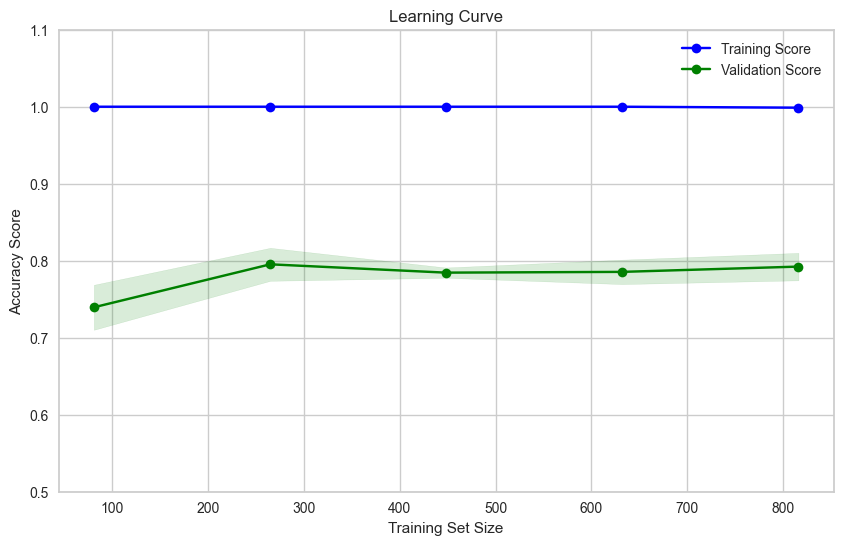

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(modelo,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.ylim([0.5, 1.1])
plt.title('Learning Curve')
plt.show()



### Validacion Cruzada

In [76]:
from sklearn.model_selection import cross_validate, cross_val_predict
cv = 10

import time
from sklearn.model_selection import cross_validate

# Guarda el tiempo de inicio
inicio2 = time.time()

# Realiza la validación cruzada del modelo
cv_results = cross_validate(modelo, data, target, cv=cv)

# Guarda el tiempo de finalización
fin2 = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido2 = fin2 - inicio2


cv_results = pd.DataFrame(cv_results)
print("accuracy: "+str(cv_results['test_score'].mean()))
modelDictData['ModelSVM1']['cross_validation_accuracy'] = str(cv_results['test_score'].mean())
modelDictData['ModelSVM1']['cross_validation_time'] = str(tiempo_transcurrido2)

accuracy: 0.7931506849315068


In [77]:
target_pred = cross_val_predict(modelo, data, target, cv = cv)
cm = confusion_matrix(target, target_pred)
modelDictData['ModelSVM1']['cross_validation_confusion_matrix'] = str(cm)

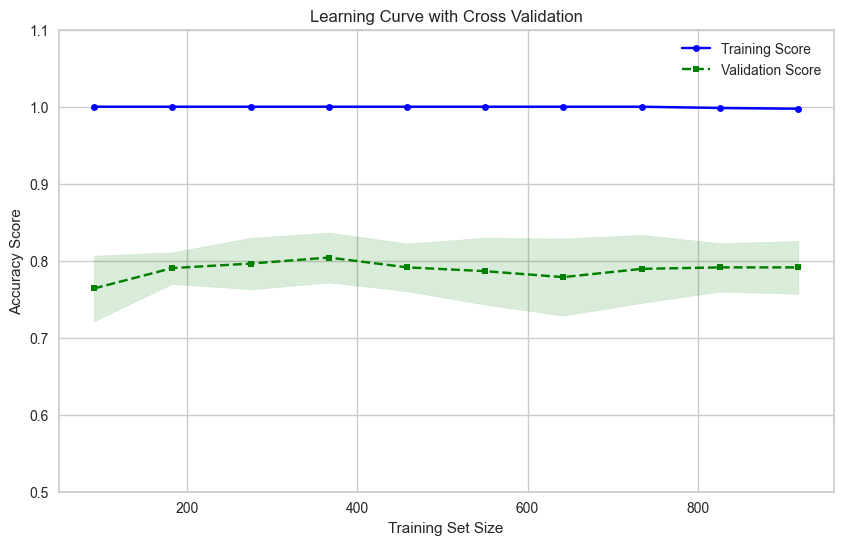

In [78]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelo,
                                                        X=data_train,
                                                        y=target_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=cv,
                                                        scoring='accuracy',  # Especifica la métrica de evaluación
                                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.ylim([0.5, 1.1])
plt.title('Learning Curve with Cross Validation')
plt.show()

## Hacemos el otro modelo

In [79]:
from sklearn.pipeline import make_pipeline

modelo2 = make_pipeline(preprocesador, SVC(kernel='rbf', gamma='scale'))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning_FV',
                                                   'MSZoning_RH',
                                                   'MSZoning_C (all)',
                                                   'MSZoning_RM', 'MSZoning_RL',
                                                   'Street_Grvl', 'Street_Pave',
                                                   'Alley_Grvl', 'Alley_Pave',
                                                   'Alley_NA', 'LotShape_Reg',
                                                   'LotShape_IR1',
                                                   'LotShape_IR3',
                                                   '...
                                                   'FullBath', '2ndFlrSF',
                                                   'BsmtUnfSF', 'LotArea',
                                                   'BsmtHalfBath', '1stFlrSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', 'PoolArea',
                                                   'BsmtFullBath', 'YrSold',
                                                   'MoSold', 'LowQualFinSF',
                                                   'GrLivArea', 'KitchenAbvGr',
                                                   'YearRemodAdd', 'BsmtFinSF2',
                                                   'WoodDeckSF', 'GarageCars',
                                                   'GarageArea', 'ScreenPorch',
                                                   'MiscVal', '3SsnPorch',
                                                   'GarageYrBlt', 'HalfBath',
                                                   'Fireplaces', 'BedroomAbvGr', ...])])),
                ('svc', SVC())])

In [80]:
import time

# Guarda el tiempo de inicio
inicio3 = time.time()

# Ajusta el modelo a los datos de entrenamiento
modelo2.fit(data_train, target_train)

# Guarda el tiempo de finalización
fin3 = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido3 = fin3 - inicio3


In [81]:

modelo2.score(data_test,target_test)

0.8401826484018264

In [82]:
target_pred_modelo2 = modelo2.predict(data_test)
accuracy = metrics.accuracy_score(target_test, target_pred_modelo2)
precision = metrics.precision_score(target_test,target_pred_modelo2,average='weighted')
recall = metrics.recall_score(target_test,target_pred_modelo2,average='weighted')
print(target_pred)
print ("Accuracy:",accuracy)
print ("Precision:",  precision)
print ("Recall: ", recall)
modelDictData['ModelSVM2'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'time': tiempo_transcurrido3}


['Cara' 'Intermedia' 'Cara' ... 'Cara' 'Intermedia' 'Intermedia']
Accuracy: 0.8401826484018264
Precision: 0.8442782639343648
Recall:  0.8401826484018264


In [83]:
from sklearn.metrics import  confusion_matrix
cm = str(confusion_matrix(target_pred_modelo2, target_test))
modelDictData['ModelSVM2']['confusion_matrix'] = str(cm)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[202   1  11]
 [  1  82  20]
 [ 19  18  84]]


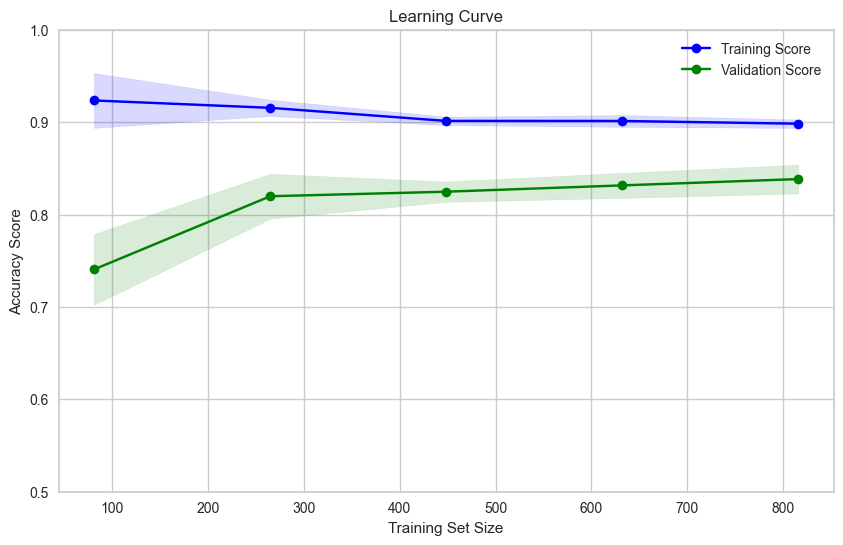

In [84]:
train_sizes, train_scores, test_scores = learning_curve(modelo2,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.ylim([0.5, 1.0])
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

### Validacion Cruzada

In [85]:
from sklearn.model_selection import cross_validate, cross_val_predict
cv = 10
import time
from sklearn.model_selection import cross_validate

# Guarda el tiempo de inicio
inicio4 = time.time()

# Realiza la validación cruzada del modelo
cv_results_modelo2 = cross_validate(modelo2, data, target, cv=cv)

# Guarda el tiempo de finalización
fin4 = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido4 = fin4 - inicio4


cv_results_modelo2 = pd.DataFrame(cv_results)
print("accuracy: "+str(cv_results_modelo2['test_score'].mean()))
modelDictData['ModelSVM2']['cross_validation_accuracy'] = str(cv_results_modelo2['test_score'].mean())
modelDictData['ModelSVM2']['cross_validation_time'] = str(tiempo_transcurrido4)

accuracy: 0.7931506849315068


In [86]:
target_pred = cross_val_predict(modelo2, data, target, cv = cv)
cm = confusion_matrix(target, target_pred)
modelDictData['ModelSVM2']['cross_validation_confusion_matrix'] = str(cm)
print("Confusion Matrix:")  
print(cm)

Confusion Matrix:
[[681   1  46]
 [  3 292  70]
 [ 48  54 265]]


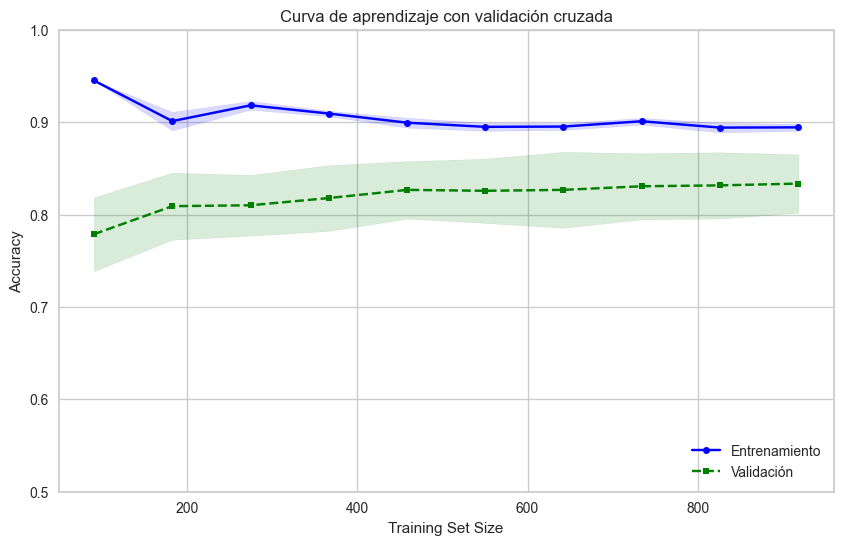

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=modelo2,
                                                        X=data_train,
                                                        y=target_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=cv,
                                                        scoring='accuracy',  # Especifica la métrica de evaluación
                                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validación')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.title('Curva de aprendizaje con validación cruzada')
plt.show()


### Modelo 3
Kernel Polinomial


In [88]:
from sklearn.pipeline import make_pipeline

modelo3 = make_pipeline(preprocesador, SVC(kernel="poly", degree=8))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning_FV',
                                                   'MSZoning_RH',
                                                   'MSZoning_C (all)',
                                                   'MSZoning_RM', 'MSZoning_RL',
                                                   'Street_Grvl', 'Street_Pave',
                                                   'Alley_Grvl', 'Alley_Pave',
                                                   'Alley_NA', 'LotShape_Reg',
                                                   'LotShape_IR1',
                                                   'LotShape_IR3',
                                                   '...
                                                   'BsmtUnfSF', 'LotArea',
                                                   'BsmtHalfBath', '1stFlrSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', 'PoolArea',
                                                   'BsmtFullBath', 'YrSold',
                                                   'MoSold', 'LowQualFinSF',
                                                   'GrLivArea', 'KitchenAbvGr',
                                                   'YearRemodAdd', 'BsmtFinSF2',
                                                   'WoodDeckSF', 'GarageCars',
                                                   'GarageArea', 'ScreenPorch',
                                                   'MiscVal', '3SsnPorch',
                                                   'GarageYrBlt', 'HalfBath',
                                                   'Fireplaces', 'BedroomAbvGr', ...])])),
                ('svc', SVC(degree=8, kernel='poly'))])

In [89]:
import time

# Guarda el tiempo de inicio
inicio5 = time.time()

# Ajusta el modelo a los datos de entrenamiento
modelo3.fit(data_train, target_train)

# Guarda el tiempo de finalización
fin5 = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido5 = fin5 - inicio5


In [90]:
target_pred = modelo3.predict(data_test)
print(target_pred)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred))
print ("Precision:", metrics.precision_score(target_test,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred,average='weighted'))
modelDictData['ModelSVM3'] = {'accuracy': metrics.accuracy_score(target_test, target_pred), 'precision': metrics.precision_score(target_test,target_pred,average='weighted'), 'recall': metrics.recall_score(target_test,target_pred,average='weighted'), 'time': tiempo_transcurrido5}


['Económica' 'Cara' 'Intermedia' 'Intermedia' 'Cara' 'Cara' 'Económica'
 'Económica' 'Cara' 'Cara' 'Intermedia' 'Intermedia' 'Intermedia' 'Cara'
 'Intermedia' 'Intermedia' 'Intermedia' 'Económica' 'Intermedia'
 'Económica' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Intermedia'
 'Económica' 'Económica' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Cara'
 'Intermedia' 'Económica' 'Económica' 'Intermedia' 'Cara' 'Cara'
 'Intermedia' 'Cara' 'Económica' 'Cara' 'Cara' 'Económica' 'Cara' 'Cara'
 'Intermedia' 'Cara' 'Cara' 'Económica' 'Cara' 'Económica' 'Cara' 'Cara'
 'Cara' 'Cara' 'Cara' 'Intermedia' 'Intermedia' 'Cara' 'Cara' 'Económica'
 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Económica' 'Intermedia'
 'Cara' 'Intermedia' 'Económica' 'Cara' 'Económica' 'Cara' 'Económica'
 'Cara' 'Cara' 'Intermedia' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Intermedia' 'Intermedia' 'Cara' 'Cara' 'Cara'
 'Cara' 'Intermedia' 'Económica' 'Intermedia' 'Cara' 'Cara' 'Cara'
 'Económi

In [91]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(target_pred, target_test)
modelDictData['ModelSVM3']['confusion_matrix'] = str(cm)
print('Confusion Matrix:') 
print(cm)

Confusion Matrix:
[[201   0  10]
 [  1  82  19]
 [ 20  19  86]]


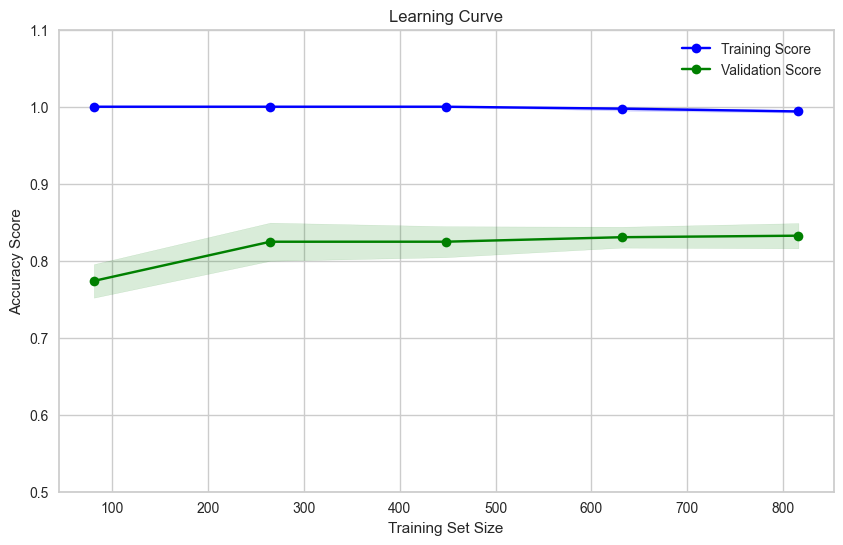

In [92]:
train_sizes, train_scores, test_scores = learning_curve(modelo3,
                                                        data_train,
                                                        target_train,
                                                        cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.ylim([0.5, 1.1])
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

In [93]:
from sklearn.model_selection import cross_validate, cross_val_predict
cv = 10
cv_results = cross_validate(modelo3, data, target, cv=cv)
cv_results = pd.DataFrame(cv_results)
print("accuracy: "+str(cv_results['test_score'].mean()))
modelDictData['ModelSVM3']['cross_validation_accuracy'] = str(cv_results['test_score'].mean())

accuracy: 0.8438356164383561


In [94]:
import time
from sklearn.model_selection import cross_val_predict

# Guarda el tiempo de inicio
inicio6 = time.time()

# Realiza la predicción con validación cruzada
target_pred = cross_val_predict(modelo3, data, target, cv=cv)

# Guarda el tiempo de finalización
fin6 = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido6 = fin6 - inicio6


cm = confusion_matrix(target, target_pred)
modelDictData['ModelSVM3']['cross_validation_confusion_matrix'] = str(cm)
modelDictData['ModelSVM3']['cross_validation_time'] = str(tiempo_transcurrido6)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[678   1  49]
 [  3 289  73]
 [ 50  52 265]]


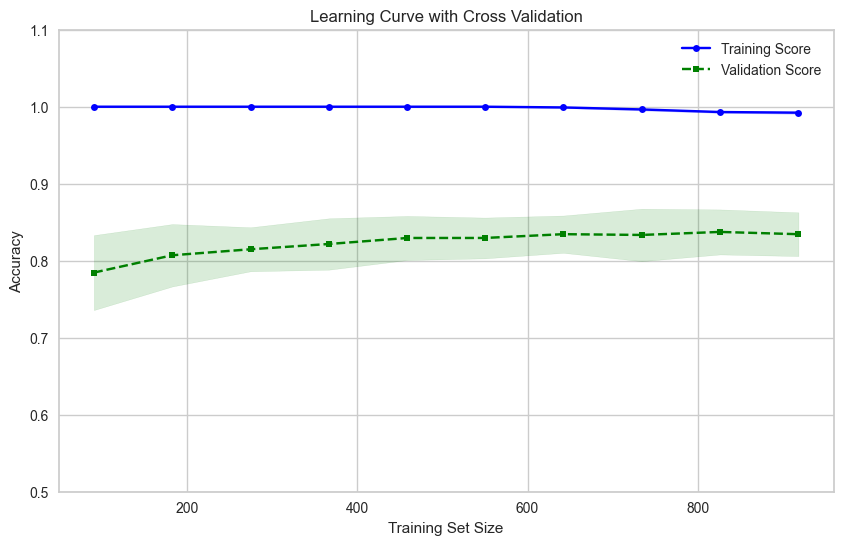

In [95]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelo3,
                                                        X=data_train,
                                                        y=target_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=cv,
                                                        scoring='accuracy',  # Especifica la métrica de evaluación
                                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='best')
plt.title('Learning Curve with Cross Validation')
plt.show()

In [96]:
import pickle

# Cargar el diccionario desde el archivo
with open('RMSE_dictModels.pkl', 'rb') as f:
    RMSE_dictModels = pickle.load(f)

with open('classification_METRICS.pkl', 'rb') as f:
    classification_METRICS = pickle.load(f)


# Modelo 4  

In [97]:
from sklearn.pipeline import make_pipeline

modelo4 = make_pipeline(preprocesador, SVC(kernel="sigmoid"))

# Esto nos permite ver dentro del modelo
from sklearn import set_config
set_config(display='diagram')
modelo4

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning_FV',
                                                   'MSZoning_RH',
                                                   'MSZoning_C (all)',
                                                   'MSZoning_RM', 'MSZoning_RL',
                                                   'Street_Grvl', 'Street_Pave',
                                                   'Alley_Grvl', 'Alley_Pave',
                                                   'Alley_NA', 'LotShape_Reg',
                                                   'LotShape_IR1',
                                                   'LotShape_IR3',
                                                   '...
                                                   'BsmtUnfSF', 'LotArea',
                                                   'BsmtHalfBath', '1stFlrSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', 'PoolArea',
                                                   'BsmtFullBath', 'YrSold',
                                                   'MoSold', 'LowQualFinSF',
                                                   'GrLivArea', 'KitchenAbvGr',
                                                   'YearRemodAdd', 'BsmtFinSF2',
                                                   'WoodDeckSF', 'GarageCars',
                                                   'GarageArea', 'ScreenPorch',
                                                   'MiscVal', '3SsnPorch',
                                                   'GarageYrBlt', 'HalfBath',
                                                   'Fireplaces', 'BedroomAbvGr', ...])])),
                ('svc', SVC(kernel='sigmoid'))])

In [98]:
_=modelo4.fit(data_train,target_train)

In [99]:
target_pred = modelo4.predict(data_test)
print(target_pred)
print ("Accuracy:",metrics.accuracy_score(target_test, target_pred))
print ("Precision:", metrics.precision_score(target_test,target_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(target_test,target_pred,average='weighted'))
modelDictData['ModelSVM4'] = {'accuracy': metrics.accuracy_score(target_test, target_pred), 'precision': metrics.precision_score(target_test,target_pred,average='weighted'), 'recall': metrics.recall_score(target_test,target_pred,average='weighted')}


['Económica' 'Cara' 'Económica' 'Cara' 'Cara' 'Cara' 'Económica'
 'Intermedia' 'Cara' 'Cara' 'Económica' 'Intermedia' 'Intermedia' 'Cara'
 'Intermedia' 'Intermedia' 'Intermedia' 'Económica' 'Intermedia'
 'Económica' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Intermedia' 'Intermedia'
 'Económica' 'Intermedia' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Cara'
 'Intermedia' 'Intermedia' 'Económica' 'Intermedia' 'Cara' 'Cara'
 'Intermedia' 'Cara' 'Económica' 'Cara' 'Cara' 'Económica' 'Cara' 'Cara'
 'Intermedia' 'Cara' 'Cara' 'Económica' 'Cara' 'Económica' 'Cara' 'Cara'
 'Cara' 'Cara' 'Cara' 'Económica' 'Intermedia' 'Cara' 'Cara' 'Económica'
 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Económica' 'Cara' 'Cara'
 'Cara' 'Económica' 'Cara' 'Económica' 'Cara' 'Económica' 'Cara' 'Cara'
 'Intermedia' 'Cara' 'Intermedia' 'Cara' 'Cara' 'Económica' 'Intermedia'
 'Intermedia' 'Intermedia' 'Intermedia' 'Cara' 'Intermedia' 'Cara' 'Cara'
 'Intermedia' 'Económica' 'Intermedia' 'Cara' 'Cara' 'Cara' 'Económica'
 'Económ

In [100]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(target_pred, target_test)
modelDictData['ModelSVM4']['confusion_matrix'] = str(cm)
print('Confusion Matrix:') 
print(cm)

Confusion Matrix:
[[203   1  15]
 [  2  78  21]
 [ 17  22  79]]


### Eficiencia entre modelos

In [101]:
print("-------------------- Modelo 1 SVM linear ------------------------------------")
print('\n', 'Accuracy: ', modelDictData['ModelSVM1']['accuracy'], '\n', 'Precision: ', modelDictData['ModelSVM1']['precision'], '\n', 'Recall: ', modelDictData['ModelSVM1']['recall'], '\n', 'time: ', modelDictData['ModelSVM1']['time'])
print('Confussion Matrix: \n',modelDictData['ModelSVM1']['confusion_matrix'])
print("-------------------- Modelo 1 SVM linear CROSS VALIDATION ------------------------------------")
print('\n', 'Accuracy: ', modelDictData['ModelSVM1']['cross_validation_accuracy'])
print('Confussion Matrix: \n',modelDictData['ModelSVM1']['cross_validation_confusion_matrix'])
print('Confussion Matrix: \n',modelDictData['ModelSVM1']['cross_validation_time'])

print("-------------------- Modelo 2 SVM gamma ------------------------------------")
print('\n', 'Accuracy: ', modelDictData['ModelSVM2']['accuracy'], '\n', 'Precision: ', modelDictData['ModelSVM2']['precision'], '\n', 'Recall: ', modelDictData['ModelSVM2']['recall'], '\n', 'time: ', modelDictData['ModelSVM1']['time'])
print('Confussion Matrix: \n',modelDictData['ModelSVM2']['confusion_matrix'])
print("-------------------- Modelo 2 SVM gamma CROSS VALIDATION ------------------------------------")
print('\n', 'Accuracy: ', modelDictData['ModelSVM2']['cross_validation_accuracy'])
print('Confussion Matrix: \n',modelDictData['ModelSVM2']['cross_validation_confusion_matrix'])
print('Confussion Matrix: \n',modelDictData['ModelSVM2']['cross_validation_time'])

print("-------------------- Modelo 3 SVM Kernel Polinomial ------------------------------------")
print('\n', 'Accuracy: ', modelDictData['ModelSVM3']['accuracy'], '\n', 'Precision: ', modelDictData['ModelSVM3']['precision'], '\n', 'Recall: ', modelDictData['ModelSVM3']['recall'], '\n', 'time: ', modelDictData['ModelSVM1']['time'])
print('Confussion Matrix: \n',modelDictData['ModelSVM3']['confusion_matrix'])
print("-------------------- Modelo 3 SVM Kernel Polinomial CROSS VALIDATION ------------------------------------")
print('\n', 'Accuracy: ', modelDictData['ModelSVM3']['cross_validation_accuracy'])
print('Confussion Matrix: \n',modelDictData['ModelSVM3']['cross_validation_confusion_matrix'])
print('Confussion Matrix: \n',modelDictData['ModelSVM3']['cross_validation_time'])

print("\n-------------------- Arboles de Decision ------------------------------------")
decission_tree = classification_METRICS['Tree']
print('\n', 'Confussion Matrix: \n', decission_tree['confusion_matrix'], '\n', 'Accuracy: ', decission_tree['accuracy'], '\n', 'Precision: ', decission_tree['precision'], '\n', 'Recall: ', decission_tree['recall'])


print("\n-------------------- Arboles de Decision Produndidades ------------------------------------")
decission_tree_profundidades = classification_METRICS['Tree_Profundidades']
print('\n', 'Accuracy: ', decission_tree_profundidades['accuracy'], '\n', 'Precision: ', decission_tree_profundidades['precision'], '\n', 'Recall: ', decission_tree_profundidades['recall'])


print("\n-------------------- Arboles de Decision Cross Validation ------------------------------------")
decission_tree_cv = classification_METRICS['Tree_CV']
print('\n', 'Accuracy: ', decission_tree_cv['accuracy'], '\n', 'Precision: ', decission_tree_cv['precision'], '\n', 'Recall: ', decission_tree_cv['recall'])


print("\n-------------------- Arboles de Decision Produndidades Cross Validation ------------------------------------")
decission_tree_profundidades_cv = classification_METRICS['Tree_Profundidades_CV']
print('\n', 'Accuracy: ', decission_tree_profundidades_cv['accuracy'], '\n', 'Precision: ', decission_tree_profundidades_cv['precision'], '\n', 'Recall: ', decission_tree_profundidades_cv['recall'])


print("\n-------------------- Random Forest ------------------------------------")
random_forest = classification_METRICS['Random Forest']
print('\n', 'Confussion Matrix: \n', random_forest['confusion_matrix'], '\n', 'Accuracy: ', random_forest['accuracy'], '\n', 'Precision: ', random_forest['precision'], '\n', 'Recall: ', random_forest['recall'])


print("\n-------------------- Random Forest Cross Validation------------------------------------")
random_forest_cv = classification_METRICS['Random Forest_CV']
print('\n', 'Accuracy: ', random_forest_cv['accuracy'], '\n', 'Precision: ', random_forest_cv['precision'], '\n', 'Recall: ', random_forest_cv['recall'])


print("\n-------------------- Random Forest Profundidades ------------------------------------")
random_forest_profundidades = classification_METRICS['Random Forest_Profundidades']
print('\n', 'Accuracy: ', random_forest_profundidades['accuracy'], '\n', 'Precision: ', random_forest_profundidades['precision'], '\n', 'Recall: ', random_forest_profundidades['recall'])


print("\n-------------------- Random Forest Produndidades Cross Validation------------------------------------")
random_forest_profundidades_cv = classification_METRICS['Random Forest_Profundidades_CV']
print('\n', 'Accuracy: ', random_forest_profundidades_cv['accuracy'], '\n', 'Precision: ', random_forest_profundidades_cv['precision'], '\n', 'Recall: ', random_forest_profundidades_cv['recall'])


print("\n-------------------- Naive Bayes ------------------------------------")
naive_bayes = classification_METRICS['Naive Bayes']
print('\n', 'Confussion Matrix: \n', naive_bayes['confusion_matrix'], '\n', 'Accuracy: ', naive_bayes['accuracy'], '\n', 'Precision: ', naive_bayes['precision'], '\n', 'Recall: ', naive_bayes['recall'])


-------------------- Modelo 1 SVM linear ------------------------------------

 Accuracy:  0.7968036529680366 
 Precision:  0.8010395414176209 
 Recall:  0.7968036529680366 
 time:  0.3048086166381836
Confussion Matrix: 
 [[195   2  18]
 [  1  79  22]
 [ 26  20  75]]
-------------------- Modelo 1 SVM linear CROSS VALIDATION ------------------------------------

 Accuracy:  0.7931506849315068
Confussion Matrix: 
 [[658   0  70]
 [ 12 283  70]
 [ 73  77 217]]
Confussion Matrix: 
 5.3358330726623535
-------------------- Modelo 2 SVM gamma ------------------------------------

 Accuracy:  0.8401826484018264 
 Precision:  0.8442782639343648 
 Recall:  0.8401826484018264 
 time:  0.3048086166381836
Confussion Matrix: 
 [[202   1  11]
 [  1  82  20]
 [ 19  18  84]]
-------------------- Modelo 2 SVM gamma CROSS VALIDATION ------------------------------------

 Accuracy:  0.7931506849315068
Confussion Matrix: 
 [[681   1  46]
 [  3 292  70]
 [ 48  54 265]]
Confussion Matrix: 
 5.987813711166382

# Modelo de regresion

In [102]:
regresion_Model = make_pipeline(preprocesador, SVC(kernel="linear"))
data_train, data_test,target_train, target_test = train_test_split(data, toRegresion,test_size=0.3,train_size=0.7)
_=regresion_Model.fit(data_train,target_train)
target_pred = regresion_Model.predict(data_test)

In [103]:

print("-------------------- SVM regresion Model ------------------------------------")
print("Root Mean squared error: %.2f" % root_mean_squared_error(target_test, target_pred))
print("Mean squared error: %.2f" % mean_squared_error(target_test, target_pred))
print('R^2 score: %.2f' % r2_score(target_test, target_pred))
modelDictData['SVM_regresion_model']= {
    'r2': r2_score(target_test, target_pred),
    'RMSE': root_mean_squared_error(target_test, target_pred),
    'MSE': mean_squared_error(target_test, target_pred)
}


-------------------- SVM regresion Model ------------------------------------
Root Mean squared error: 48780.88
Mean squared error: 2379574015.32
R^2 score: 0.62


# Comparacion de resultados

In [104]:
for model, data in RMSE_dictModels.items():
    print(f"-------------------- {model} ------------------------------------")
    for metric, value in data.items():
        print(metric, ':', value)
    print("\n")


-------------------- Linear Regression ------------------------------------
RMSE : 51277.5703855027
MSE : 2629389224.6401834
r2 : 0.6218501565388114


-------------------- Linear Regression Multivariable ------------------------------------
RMSE : 52196.340373107436
r2 : 0.5677688067688346
MSE : 2724457948.345285


-------------------- Linear Regression Multivariable learning_curve ------------------------------------
explained_variance : 0.5746
mean_squared_log_error : 0.0353
r2 : 0.5678
MAE : 23393.4461
MSE : 2724457948.3453
RMSE : 52196.3404
AIC : 22329.7716
BIC : 22694.4834


-------------------- Linear Regression Multivariable predictores ------------------------------------
explained_variance : 0.7557
mean_squared_log_error : 0.0355
r2 : 0.7551
MAE : 23204.0488
MSE : 1543439744.1619
RMSE : 39286.6357
AIC : 21675.5822
BIC : 21857.9381


-------------------- Ridge Regression ------------------------------------
explained_variance : 0.8019
mean_squared_log_error : 0.0307
r2 : 0.7995